In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
from keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import SGD
# fix dimension ordering issue
from keras import backend as K
K.set_image_data_format('channels_last')

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [3]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
num_classes = testY.shape[1]

In [4]:
# define the larger model
def larger_CNN1():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28,28,1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [5]:
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, early_stopping]

In [6]:
# build the model
model2 = larger_CNN1()
# Fit the model
history = model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=200, verbose=2,callbacks=callbacks)
# Final evaluation of the model
scores2 = model2.evaluate(testX, testY, verbose=0)

Epoch 1/10
300/300 - 21s - loss: 1.1170 - accuracy: 0.7949 - val_loss: 0.1404 - val_accuracy: 0.9569
Epoch 2/10
300/300 - 21s - loss: 0.1689 - accuracy: 0.9488 - val_loss: 0.0858 - val_accuracy: 0.9719
Epoch 3/10
300/300 - 20s - loss: 0.1168 - accuracy: 0.9642 - val_loss: 0.0665 - val_accuracy: 0.9786
Epoch 4/10
300/300 - 20s - loss: 0.0935 - accuracy: 0.9709 - val_loss: 0.0589 - val_accuracy: 0.9818
Epoch 5/10
300/300 - 20s - loss: 0.0771 - accuracy: 0.9760 - val_loss: 0.0497 - val_accuracy: 0.9840
Epoch 6/10
300/300 - 20s - loss: 0.0668 - accuracy: 0.9792 - val_loss: 0.0414 - val_accuracy: 0.9862
Epoch 7/10
300/300 - 21s - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0456 - val_accuracy: 0.9856
Epoch 8/10
300/300 - 20s - loss: 0.0547 - accuracy: 0.9826 - val_loss: 0.0408 - val_accuracy: 0.9866
Epoch 9/10
300/300 - 21s - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.0411 - val_accuracy: 0.9863
Epoch 10/10
300/300 - 20s - loss: 0.0471 - accuracy: 0.9845 - val_loss: 0.0407 - val_accura

In [7]:
model2.summary()
print("Larger CNN Error: %.2f%%" % (100-scores2[1]*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [8]:
y_pred = model2.predict(testX)
y_pred = np.argmax(np.round(y_pred),axis=1)

In [9]:
import numpy as np
testY=np.argmax(testY, axis=1)
testY[1]

2

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - testY)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y_pred - testY)** 2))
rmse = np.sqrt(np.mean((y_pred - testY)** 2))
print("RMSE: %.2f%%" % rmse)
print("R2-score: %.2f" % r2_score(y_pred, testY))
print("Larger CNN Error: %.2f%%" % (100-scores2[1]*100))

Mean absolute error: 0.06
Mean sum of squares (MSE): 0.31
RMSE: 0.56%
R2-score: 0.96
Larger CNN Error: 1.26%


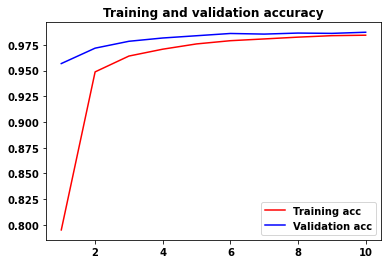

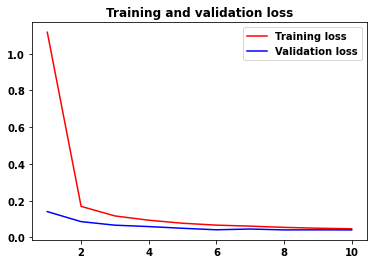

In [11]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

pyplot.title('Training and validation accuracy')
pyplot.plot(epochs, acc, 'red', label='Training acc')
pyplot.plot(epochs, val_acc, 'blue', label='Validation acc')
pyplot.legend()

pyplot.figure()
pyplot.title('Training and validation loss')
pyplot.plot(epochs, loss, 'red', label='Training loss')
pyplot.plot(epochs, val_loss, 'blue', label='Validation loss')

pyplot.legend()

pyplot.show()